<a href="https://colab.research.google.com/github/EldritchBear/ADA-Informes/blob/main/CaminoM%C3%A1sCorto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema

El problema del camino más corto busca encontrar la distancia más corta desde un nodo **v** a un nodo **w**. Dependiendo del tipo de gráfo, si este contiene arcos negativos o no, va a tener que resolverse mediante un algoritmo u otro, en este informe se implementara el algoritmo de **Dijkstra**, el cual solo sirve para gráfos con arcos positivos, mientras que el algoritmo **Bellman-Ford** soporta arcos tanto negativos como positivos.

**Entrada:** Un grafo dirigido $G = (V,E)$ con valores asociados a sus arcos y su vertice fuente "v".

**Salida:** Se retorna la distancia más corta para cada vértice "v" o en caso de que el gráfo contenga un ciclo negativo el algoritmo lo reconocerá y detendrá la ejecucción.

#2. Descripción del algoritmo


##2.1 Algoritmo Bellman-Ford

El algoritmo de **Bellman-Ford** funciona de la siguiente manera:

1. Se inicializa un arreglo de distancias de tamaño **V** con todos los valores menos el del nodo fuente como **infinito**

2. Se comienza a calcular la distancia entre los nodos, esto se realiza según la función de recurrencia, la cual es:

  $L_{i,v} =
  \min \left\{
  \begin{array}{cc}
  L_{i-1,v} & \text{(Caso 1)} \\
  \min\limits_{(w,v)\in E} \{L_{i-1,w}+l+{wv}\} & \text{(Caso 2)}
          \end{array}
  \right\}$

3. Si el algoritmo detecta un ciclo negativo se muestra por pantalla que se encontró un ciclo y se detiene el algoritmo. El algoritmo detecta un ciclo negativo si $dist[v] > dist[u] + arco uv$.

4. Si el algoritmo no encontro un ciclo negativo se muestra la distancia minima de cada nodo.

##2.2 Algoritmo de Dijkstra

El algoritmo de **Dijkstra** funciona de la siguiente forma:

1.  Se inicializa un arreglo de tamaño **V** con valores infinitos.

2.  Se elige un nodo que no esté en el conjunto y tenga valor de distancia mínimo, este valor es luego ingresado al conjunto. 

3. Se comienzan a iterar sobre los nodos adyacentes actualizando los valores los valores de distancia de cada uno.

4. Finalmente se retorna la lista con los valores.

##2.3 Implementación del algoritmo Bellman-Ford

In [6]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [7]:
import networkx as nx


def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [112]:
import matplotlib.pyplot as plt

def bellmanFord(array,v,e,s,verbose):
  L = [float("inf")] * v                                                        #se inicializa la lista de distancias
  L[s] = 0
  flag = False

  if verbose:
    print(f"se crea una lista de tamaño {v}\n")

  for i in range(v-1):                                                          #se recorren los nodos y sus arcos calculando la distancia de los nodos aplicando la
    for j in range(e):                                                          #funcion de recurrencia
      if L[array[j][0]] + array[j][2] < L[array[j][1]]:
        if verbose:
          print(f"se revisa si {L[array[j][0]] + array[j][2]} < {L[array[j][1]]}")
          print("se actualiza la distancia")
        L[array[j][1]] = L[array[j][0]] + array[j][2]

  if verbose:
    print("\nse comprueba si existe un ciclo negativo")

  for i in range(e):                                                            #se busca el peso entre dos nodos 
    x = array[i][0]
    y = array[i][1]
    aux = array[i][2]
    if L[x] != float("inf") and L[x] + aux < L[y]:                              #se verifica si se encuentra un ciclo negativo
      print("se ha encontrado un ciclo negativo")
      flag = True

  if verbose == True and flag == False:
    print("no se ha encontrado ciclo negativo\n")
      
  for i in range(v):
    print(f"Camino más corto desde el nodo {s} al nodo {i}: {L[i]}")

### Implementación con verbose (y visualize)

se crea una lista de tamaño 10

se revisa si 26 < inf
se actualiza la distancia
se revisa si 16 < inf
se actualiza la distancia
se revisa si 107 < inf
se actualiza la distancia
se revisa si 202 < inf
se actualiza la distancia
se revisa si 169 < inf
se actualiza la distancia

se comprueba si existe un ciclo negativo
no se ha encontrado ciclo negativo

Camino más corto desde el nodo 0 al nodo 0: 0
Camino más corto desde el nodo 0 al nodo 1: inf
Camino más corto desde el nodo 0 al nodo 2: 107
Camino más corto desde el nodo 0 al nodo 3: 16
Camino más corto desde el nodo 0 al nodo 4: inf
Camino más corto desde el nodo 0 al nodo 5: 169
Camino más corto desde el nodo 0 al nodo 6: 26
Camino más corto desde el nodo 0 al nodo 7: 202
Camino más corto desde el nodo 0 al nodo 8: inf
Camino más corto desde el nodo 0 al nodo 9: inf


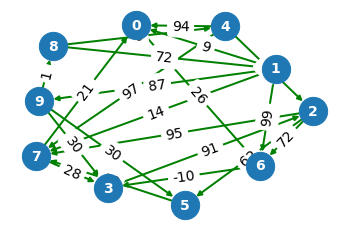

In [105]:
A,S = instance_generator(10)
verbose = True
bellmanFord(A,10,len(A),S,verbose)

#visualize momento

grafo = graph_to_nxdigraph(A,10)
pos=nx.spring_layout(grafo,20)
labels = nx.get_edge_attributes(grafo,'weight')
nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels,font_size=14)
nx.draw(grafo,pos, with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

###Implementación sin verbose

In [113]:
grafo,fuente = instance_generator(10)
verbose = False
bellmanFord(grafo,10,len(A),fuente,verbose)

Camino más corto desde el nodo 3 al nodo 0: 51
Camino más corto desde el nodo 3 al nodo 1: inf
Camino más corto desde el nodo 3 al nodo 2: 169
Camino más corto desde el nodo 3 al nodo 3: 0
Camino más corto desde el nodo 3 al nodo 4: inf
Camino más corto desde el nodo 3 al nodo 5: 32
Camino más corto desde el nodo 3 al nodo 6: 89
Camino más corto desde el nodo 3 al nodo 7: 43
Camino más corto desde el nodo 3 al nodo 8: inf
Camino más corto desde el nodo 3 al nodo 9: 124


##2.4 Implementación del algoritmo de Dijkstra

#3. Tiempo de ejecución

##3.1 Algoritmo Bellman-Ford
El algoritmo de Bellman-Ford tiene los siguientes tiempos de ejecuciones para los distintos casos:

**Peor Caso:** En este caso el algoritmo toma una complejidad temporal de $O(n^3)$, esto se produce cuando en la primera iteración ya se calculó el camino más corto pero el algoritmo no se detiene y sigue con el analisis, lo que significa que la complejidad completa es de:

$O(E*V) = O(V^2) * O(V)$

donde $O(V^2)$ viene siendo de el algoritmo habiendo calculado en las primeras iteraciones el camino más corto pero continua con las iteraciones.

**Caso Promedio:** El caso promedio viene dado por $O(E*V)$, osea la cantidad de nodos por la cantidad de vertices. Este caso nace de arreglar el problema que mantiene el peor caso, donde este luego de calcular el camino más corto este sigue iterando, en el caso promedio se verifica si se estan realizando cambios, en caso de que no se realicen cambios el algoritmo entiende que no existe un mejor camino más corto, por lo que termina con las iteraciones.

**Mejor Caso:** El mejor caso viene dado por $O(E)$, esto sucede cuando los nodos toman un camino lineal, es decir cada nodo tiene solo un arco.

**Complejidad Espacial:** $O(V)$, siendo esto la cantidad de nodos.

##3.2 Algoritmo de Dijkstra

El algoritmo Dijkstra presenta una complejidad espacial de $O(V^2)$, esto se debe a que para visitar cada nodo y procesarlo ambos de estos procesos es de $O(V)$, por lo que finalmente tendriamos que:

$O(V)*O(V) = O(V^2)$

Al tener que visitar y procesar estos "v" nodos terminamos teniendo que la complejidad de este algoritmo es de $O(V^2)$.

**Complejidad Espacial:** $O(V^2)$, esto se debe que el algoritmo de Dijkstra utiliza una matriz para ir almacenando los datos.


#4. Correctitud

Si el algoritmo de Bellman-Ford recibe un grafo sin ciclos negativos este calcula correctamente su camino más corto.

Esto puede ser demostrado mediante inducción.

**Caso Base:** si k = 0 tenemos que $dist_{k}$ = 0 para V = S, esto es debido que el camino de un nodo a sí mismo es de 0.

**Hipótesis Inductiva:** Despues de cada iteración "i", para cada nodo "v" se tiene que $dist(s,v)$ es el camino más corto.

**Paso Inductivo:** Supongamos que la hipótesis se mantiene para "i+1"
Sea u un nodo de v, asumiremos que existe una ruta más corta entre s y u, sea u el nodo anterior a v en esta ruta.

Por hipótesis inductiva, sabemos que $dist(u,i)$ es la distancia más corta entre el nodo raíz s y el nodo u. En la iteración i+1, nos aseguramos que se cumple $dist(v,i+1) =< dist(u,i) + w(u,v)$ por el paso de reajuste del algoritmo, y tenemos también que $dist(v,i+1)$ es mayor o igual al largo del camino que utiliza al meno i+1. Por lo tanto, $dist(v,i+1)$ es el largo del camino más corto entre s y v utilizando máximo i+1 arcos.

Después de n-1 iteraciones, para cada nodo v, la $dist(v,n-1)$ es el largo del camino más corto desde el nodo raíz hasta el nodo v utilizando como máximo n-1 arcos. 